In [14]:
#the data is downloaded from the COVID 19 state testing and patient databases below:
#1.https://api.covid19india.org/csv/latest/tested_numbers_icmr_data.csv
#2.https://api.covid19india.org/csv/latest/state_wise_daily.csv
#the Statewise_daily api has the daily counts of confirmed, recovered and mortality cases 
#The testting data too is a time-series regularly updated witht the daily testing data
#this code computes statewise aggregates over time and plots the statewise daily and cumulative tests done in comparison to the confirmed cases.
#This code also computes and plots the positive rate of cases in India
#The graphs from this code is put up on my website @ https://sites.google.com/site/sohamdasgupta04
import matplotlib
import lmfit
import pandas as pd
import matplotlib.pyplot as plt
from lmfit.models import LorentzianModel, ExponentialModel, PowerLawModel
from numpy import linspace
plt.close('all')
from pprint import pprint
from datetime import timedelta, date

In [15]:
last_k = 10
df = pd.read_csv("TEST_UPDATE.csv")
dfd=pd.read_csv("Book1.csv")
state = 'KL'

In [16]:
df

,IndiaTest,IndiaConfirmed,TNT,TNC,KLT,KLC,KAT,KAC,DLT,DLC,...,GJC,India,TN,KL,KA,DL,MH,WB,MP,GJ
0,12500,151,690.0,48.0,11986.0,9.0,6967.0,6.0,9041.0,93.0,...,11.0,500,150.0,700.0,600.0,800.0,4000.0,300.0,400.0,1500.0
1,13125,173,834.0,96.0,12710.0,12.0,7613.0,16.0,9968.0,51.0,...,76.0,625,144.0,724.0,646.0,927.0,4123.0,402.0,286.0,1676.0
2,14175,223,911.0,77.0,13339.0,7.0,7975.0,10.0,11061.0,183.0,...,116.0,1050,77.0,629.0,362.0,1093.0,6841.0,206.0,1079.0,1818.0
3,15404,283,969.0,58.0,14163.0,10.0,8560.0,8.0,11709.0,166.0,...,90.0,1229,58.0,824.0,585.0,648.0,3827.0,191.0,1914.0,2045.0
4,16911,360,1075.0,106.0,14989.0,2.0,9251.0,17.0,14036.0,85.0,...,48.0,1507,106.0,826.0,691.0,2327.0,4057.0,237.0,1467.0,1952.0
5,18127,433,1173.0,98.0,15683.0,3.0,10017.0,15.0,15032.0,356.0,...,56.0,1216,98.0,694.0,766.0,996.0,1346.0,270.0,1965.0,2536.0
6,20707,519,1204.0,31.0,16235.0,8.0,11107.0,13.0,16282.0,51.0,...,78.0,2580,31.0,552.0,1090.0,1250.0,4071.0,288.0,319.0,729.0
7,22694,606,1242.0,38.0,16475.0,1.0,12483.0,19.0,16605.0,17.0,...,116.0,1987,38.0,240.0,1376.0,323.0,5740.0,389.0,600.0,4217.0
8,25144,694,1267.0,25.0,17400.0,7.0,13724.0,36.0,18784.0,62.0,...,163.0,2450,25.0,925.0,1241.0,2179.0,4796.0,341.0,600.0,1706.0
9,26300,824,1323.0,56.0,18029.0,1.0,17594.0,44.0,21409.0,67.0,...,170.0,1156,56.0,629.0,3870.0,2625.0,4488.0,401.0,1492.0,2580.0


Transform India data : Since we iterate over dates, it is easier to have dates as rows instead of columns 


In [17]:
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2020, 3, 10)
end_dt = date(2020, 4, 10)
analysis_dates = []
for dt in daterange(start_dt, end_dt):
    analysis_dates.append(dt.strftime("%Y-%m-%d"))
df['KAAC']=df['KAC'].cumsum()
df['KLLC']=df['KLC'].cumsum()
df['GJJC']=df['GJC'].cumsum()
df['MHHC']=df['MHC'].cumsum()
df['DLLC']=df['DLC'].cumsum()
df['WBBC']=df['WBC'].cumsum()
df['MPPC']=df['MPC'].cumsum()


In [18]:
df['Positive rate']=df['IndiaConfirmed']/df['IndiaTest']*100

df_new=pd.DataFrame()
df_new['Karnataka']=df['KAC']/df['KA']*100
df_new['Kerala']=df['KLC']/df['KL']*100
df_new['Gujarat']=df['GJC']/df['GJ']*100
df_new['Maharashtra']=df['MHC']/df['MH']*100
df_new['Delhi']=df['DLC']/df['DL']*100
df_new['West Bengal']=df['WBC']/df['WB']*100
df_new['Madhya Pradesh']=df['MPC']/df['MP']*100
dfd

,Date,Confirmed,Recovered,Deaths,TCJ,TRJ,TDJ,TCIS,TRIS,TDIS,...,TA,TSK,TC,TG,TUS,TUK,TT,New tests,Recovery rate,Death rate
0,04-03-2020,28,3,0,331.0,43.0,6.0,15.0,1.0,0.0,...,650214.0,633921.0,919368.0,2547052.0,7053366.0,945299.0,2000.0,400.0,10.714286,0.000000
1,05-03-2020,30,3,0,360.0,43.0,6.0,20.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2500.0,500.0,10.000000,0.000000
2,06-03-2020,31,3,0,420.0,46.0,6.0,37.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,500.0,9.677419,0.000000
3,07-03-2020,34,3,0,461.0,76.0,6.0,43.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3500.0,500.0,8.823529,0.000000
4,08-03-2020,39,3,0,502.0,76.0,6.0,61.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,500.0,7.692308,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,04-05-2020,46437,12847,1566,15078.0,4156.0,536.0,16246.0,10064.0,235.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1140000.0,50000.0,27.665439,3.372311
62,NaN,49000,13847,1580,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,53000,14847,1600,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,56000,15847,1650,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df['Positive rate']=df['IndiaConfirmed']/df['IndiaTest']*100


df_new['Karnataka Total']=df['KAAC']/df['KAT']*100
df_new['Kerala Total']=df['KLLC']/df['KLT']*100
df_new['Gujarat Total']=df['GJJC']/df['GJT']*100
df_new['Maharashtra Total']=df['MHHC']/df['MHT']*100
df_new['Delhi Total']=df['DLLC']/df['DLT']*100
df_new['West Bengal Total']=df['WBBC']/df['WBT']*100
df_new['Madhya Pradesh Total']=df['MPPC']/df['MPT']*100
df_new

,Karnataka,Kerala,Gujarat,Maharashtra,Delhi,West Bengal,Madhya Pradesh,Karnataka Total,Kerala Total,Gujarat Total,Maharashtra Total,Delhi Total,West Bengal Total,Madhya Pradesh Total
0,1.000000,1.285714,0.733333,2.925000,11.625000,2.666667,12.750000,0.086120,0.075088,0.260417,0.560425,1.028647,0.537996,1.352785
1,2.476780,1.657459,4.534606,5.554208,5.501618,0.995025,24.475524,0.288979,0.165224,1.474576,1.384000,1.444623,0.635257,2.983235
2,2.762431,1.112878,6.380638,3.069727,16.742909,6.310680,3.707136,0.401254,0.209911,2.630215,1.746176,2.956333,1.193317,3.135346
3,1.367521,1.213592,4.400978,4.886334,25.617284,5.235602,4.075235,0.467290,0.268305,3.001127,2.083100,4.210436,1.531059,3.390552
4,2.460203,0.242131,2.459016,5.447375,3.652772,3.375527,2.249489,0.616150,0.266862,2.910798,2.426683,4.117982,1.704320,3.193988
5,1.958225,0.432277,2.208202,26.151560,35.742972,6.666667,2.646310,0.718778,0.274182,2.785769,3.204207,6.213411,2.184032,3.091308
6,1.192661,1.449275,10.699588,8.499140,4.080000,13.194444,39.811912,0.765283,0.314136,3.170895,3.681715,6.049625,3.213242,4.175926
7,1.380814,0.416667,2.750771,4.111498,5.263158,5.912596,32.833333,0.833133,0.315630,3.078606,3.730199,6.034327,3.515850,5.684211
8,2.900886,0.756757,9.554513,5.942452,2.845342,5.278592,37.666667,1.020111,0.339080,3.607138,3.920759,5.664395,3.673576,7.283333
9,1.136951,0.158983,6.589147,2.673797,2.552381,5.985037,9.785523,1.045811,0.332797,3.934761,3.827743,5.282825,3.893637,7.560036


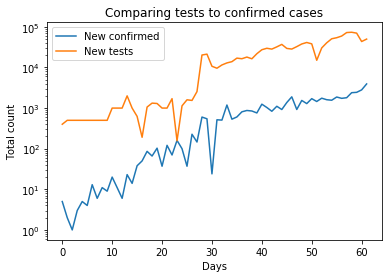

In [20]:
ax = plt.gca()
dfd.plot(y='New confirmed', kind = 'line',ax=ax)
dfd.plot(y='New tests', kind = 'line',ax=ax)


plt.title('Comparing tests to confirmed cases')
ax.set_yscale('log')
plt.xlabel('Days')

plt.ylabel('Total count')
plt.savefig('statepositive.jpeg')
plt.show()

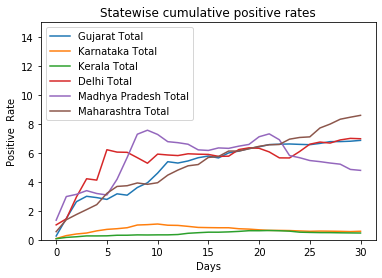

In [21]:
ax = plt.gca()
df_new.plot(y='Gujarat Total', kind = 'line',ax=ax)
df_new.plot(y='Karnataka Total', kind = 'line',ax=ax)
df_new.plot(y='Kerala Total', kind = 'line',ax=ax)
df_new.plot(y='Delhi Total', kind = 'line',ax=ax)
df_new.plot(y='Madhya Pradesh Total', kind = 'line',ax=ax)
df_new.plot(y='Maharashtra Total', kind = 'line',ax=ax)
ax.set_ylim(0,15)
plt.ylabel('Positive  Rate')
plt.title('Statewise cumulative positive rates')
plt.xlabel('Days')
plt.savefig('statepositive.jpeg')
plt.show()

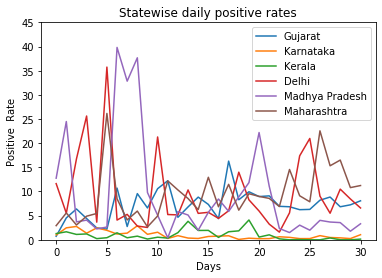

In [22]:
ax = plt.gca()
df_new.plot(y='Gujarat', kind = 'line',ax=ax)
df_new.plot(y='Karnataka', kind = 'line',ax=ax)
df_new.plot(y='Kerala', kind = 'line',ax=ax)
df_new.plot(y='Delhi', kind = 'line',ax=ax)
df_new.plot(y='Madhya Pradesh', kind = 'line',ax=ax)
df_new.plot(y='Maharashtra', kind = 'line',ax=ax)
ax.set_ylim(0,45)

plt.title('Statewise daily positive rates')
plt.xlabel('Days')

plt.ylabel('Positive  Rate')
plt.savefig('statepositive.jpeg')
plt.show()

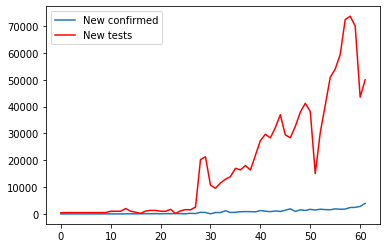

In [23]:
ax = plt.gca()
dfd.plot(y='New confirmed', kind = 'line',ax=ax)
dfd.plot(y='New tests', kind = 'line',color='red',ax=ax) 
plt.savefig('INDIA_TESTS_new.jpeg')
plt.show()

In [24]:
dfs=pd.DataFrame()
dfs['P.r']=df['Positive rate']
dfs['Positive rate']=dfs.rolling(7).mean()
dfs

,P.r,Positive rate
0,1.208000,NaN
1,1.318095,NaN
2,1.573192,NaN
3,1.837185,NaN
4,2.128792,NaN
5,2.388702,NaN
6,2.506399,1.851481
7,2.670309,2.060382
8,2.760102,2.266383
9,3.133080,2.489224


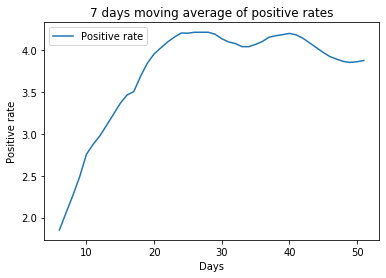

In [25]:
ax = plt.gca()
dfs.plot(y='Positive rate', kind = 'line',ax=ax)

plt.title('7 days moving average of positive rates')
plt.xlabel('Days')
plt.ylabel('Positive rate')
plt.savefig('Positive.jpeg')
plt.show()

In [26]:
df

,IndiaTest,IndiaConfirmed,TNT,TNC,KLT,KLC,KAT,KAC,DLT,DLC,...,MP,GJ,KAAC,KLLC,GJJC,MHHC,DLLC,WBBC,MPPC,Positive rate
0,12500,151,690.0,48.0,11986.0,9.0,6967.0,6.0,9041.0,93.0,...,400.0,1500.0,6.0,9.0,11.0,117.0,93.0,8.0,51.0,1.208000
1,13125,173,834.0,96.0,12710.0,12.0,7613.0,16.0,9968.0,51.0,...,286.0,1676.0,22.0,21.0,87.0,346.0,144.0,12.0,121.0,1.318095
2,14175,223,911.0,77.0,13339.0,7.0,7975.0,10.0,11061.0,183.0,...,1079.0,1818.0,32.0,28.0,203.0,556.0,327.0,25.0,161.0,1.573192
3,15404,283,969.0,58.0,14163.0,10.0,8560.0,8.0,11709.0,166.0,...,1914.0,2045.0,40.0,38.0,293.0,743.0,493.0,35.0,239.0,1.837185
4,16911,360,1075.0,106.0,14989.0,2.0,9251.0,17.0,14036.0,85.0,...,1467.0,1952.0,57.0,40.0,341.0,964.0,578.0,43.0,272.0,2.128792
5,18127,433,1173.0,98.0,15683.0,3.0,10017.0,15.0,15032.0,356.0,...,1965.0,2536.0,72.0,43.0,397.0,1316.0,934.0,61.0,324.0,2.388702
6,20707,519,1204.0,31.0,16235.0,8.0,11107.0,13.0,16282.0,51.0,...,319.0,729.0,85.0,51.0,475.0,1662.0,985.0,99.0,451.0,2.506399
7,22694,606,1242.0,38.0,16475.0,1.0,12483.0,19.0,16605.0,17.0,...,600.0,4217.0,104.0,52.0,591.0,1898.0,1002.0,122.0,648.0,2.670309
8,25144,694,1267.0,25.0,17400.0,7.0,13724.0,36.0,18784.0,62.0,...,600.0,1706.0,140.0,59.0,754.0,2183.0,1064.0,140.0,874.0,2.760102
9,26300,824,1323.0,56.0,18029.0,1.0,17594.0,44.0,21409.0,67.0,...,1492.0,2580.0,184.0,60.0,924.0,2303.0,1131.0,164.0,1020.0,3.133080


KeyError: '3 days moving average'

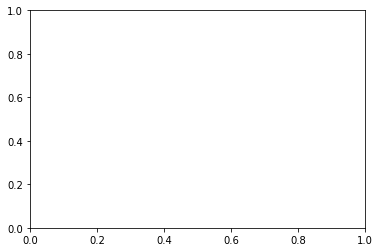